# Machine Learning Final Project  <img style="display: inline; align-right: 300px; position: absolute; right: 0px;" src="files/Logo-AIT-Red600x-8.webp" width="130"/>


<font color=green>SQUAD ForeCasting</font>

👉 Francesc Vilaró</br>
👉 Berta Pfaff</br>
👉 Sergio Salvador</br>

On this project, the Adult dataset will be used. This dataset comes from the following University of California Irvine path (Url: https://archive.ics.uci.edu/ml/datasets/Census+Income)

The objective of the problem is to predict if a person has a salary of more than 50 thousand dollars per year or not, based on their characteristics.

The Census Income dataset has <strong>32,561 entries</strong>. Each entry contains the following information about an individual:

<font style = "margin-left: 30px;">✅ <strong>age:</strong> The age of an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>workclass:</strong> A general term to represent the employment status of an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>fnlwgt:</strong> Final weight. In other words, this is the number of people the census believes the entry represents..</font><br>
<font style = "margin-left: 30px;">✅ <strong>education:</strong> The highest level of education achieved by an individual.</font><br>
<font style = "margin-left: 30px;">✅ <strong>education-num:</strong> The highest level of education achieved in numerical form.</font><br>
<font style = "margin-left: 30px;">✅ <strong>marital-status:</strong> Marital status of an individual.</font><br>
<font style = "margin-left: 30px;">✅ <strong>occupation:</strong> The general type of occupation of an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>relationship:</strong> Represents what this individual is relative to others</font><br>
<font style = "margin-left: 30px;">✅ <strong>race:</strong> Descriptions of an individual’s race</font><br>
<font style = "margin-left: 30px;">✅ <strong>sex:</strong> The biological sex of the individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>capital-gain:</strong> Capital gains for an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>capital-loss:</strong> Capital loss for an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>hours-per-week:</strong> The hours an individual has reported to work per week</font><br>
<font style = "margin-left: 30px;">✅ <strong>native-country:</strong> Country of origin for an individual</font><br>
<font style = "margin-left: 30px;">✅ <strong>TARGET:</strong> Whether or not an individual makes more than 50k annually.</font><br>

In this project the following libraries have been used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from mglearn.plots import plot_2d_separator
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

## Importing CSV file and initial transformations

CSV is imported using Pandas and headers are defined, since the original file doesn't have them

In [2]:
df = pd.read_csv("files/adult.csv", index_col=False, names = ["age", "Work class", "fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "TARGET" ])

Verification that the file has been imported correctly

In [3]:
df.head()

,age,Work class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,TARGET
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Column type is checked to determine if any column needs a transformation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   Work class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  TARGET          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Object type columns are transformed to categorical

In [5]:
only_obj = df.select_dtypes(include=["object"])
only_numeric = df.select_dtypes(include=["int64", "float64"])

for column_ in only_obj.columns:
    df[column_] = pd.Categorical(df[column_])
    
only_cat = df.select_dtypes(include=["category"])

We can now see that object type columns have been transformed to category correctly

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   Work class      32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-num   32561 non-null  int64   
 5   Marital-status  32561 non-null  category
 6   Occupation      32561 non-null  category
 7   Relationship    32561 non-null  category
 8   Race            32561 non-null  category
 9   Sex             32561 non-null  category
 10  Capital-gain    32561 non-null  int64   
 11  Capital-loss    32561 non-null  int64   
 12  Hours-per-week  32561 non-null  int64   
 13  Native-country  32561 non-null  category
 14  TARGET          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


## EDA

### Target variable

The original dataset contains a distribution of 23.93% entries labeled with >50k and 76.07% entries labeled with <=50k. For a better prediction, training and test sets will have to maintain the above distribution.

In [7]:
n_bigger_50k = df["TARGET"].value_counts()[1]
n_lower_50k = df["TARGET"].value_counts()[0]
total = n_bigger_50k + n_lower_50k

print(f"""
Count of values <=50K: {n_lower_50k}, {round((n_lower_50k/total)*100, 2)}%
Count of values  >50K:  {n_bigger_50k}, {round((n_bigger_50k/total)*100, 2)}%
""")


Count of values <=50K: 24720, 75.92%
Count of values  >50K:  7841, 24.08%



### Independent variables

#### Categorical features

Unique values are evaluated for categorical columns to check if there are missing or mispelled values

##### Unique values

It is observed that some categorical columns present missing values as '?'. These will have to be set to NA and then dropped from the dataset

In [8]:
df["Work class"].unique().to_list()

[' State-gov',
 ' Self-emp-not-inc',
 ' Private',
 ' Federal-gov',
 ' Local-gov',
 ' ?',
 ' Self-emp-inc',
 ' Without-pay',
 ' Never-worked']

In [9]:
df["Education"].unique().to_list()

[' Bachelors',
 ' HS-grad',
 ' 11th',
 ' Masters',
 ' 9th',
 ' Some-college',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' 7th-8th',
 ' Doctorate',
 ' Prof-school',
 ' 5th-6th',
 ' 10th',
 ' 1st-4th',
 ' Preschool',
 ' 12th']

In [10]:
df["Marital-status"].unique().to_list()

[' Never-married',
 ' Married-civ-spouse',
 ' Divorced',
 ' Married-spouse-absent',
 ' Separated',
 ' Married-AF-spouse',
 ' Widowed']

In [11]:
df["Occupation"].unique().to_list()

[' Adm-clerical',
 ' Exec-managerial',
 ' Handlers-cleaners',
 ' Prof-specialty',
 ' Other-service',
 ' Sales',
 ' Craft-repair',
 ' Transport-moving',
 ' Farming-fishing',
 ' Machine-op-inspct',
 ' Tech-support',
 ' ?',
 ' Protective-serv',
 ' Armed-Forces',
 ' Priv-house-serv']

In [12]:
df["Relationship"].unique().to_list()

[' Not-in-family',
 ' Husband',
 ' Wife',
 ' Own-child',
 ' Unmarried',
 ' Other-relative']

In [13]:
df["Race"].unique().to_list()

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']

In [14]:
df["Sex"].unique().to_list()

[' Male', ' Female']

In [15]:
df["Native-country"].unique().to_list()

[' United-States',
 ' Cuba',
 ' Jamaica',
 ' India',
 ' ?',
 ' Mexico',
 ' South',
 ' Puerto-Rico',
 ' Honduras',
 ' England',
 ' Canada',
 ' Germany',
 ' Iran',
 ' Philippines',
 ' Italy',
 ' Poland',
 ' Columbia',
 ' Cambodia',
 ' Thailand',
 ' Ecuador',
 ' Laos',
 ' Taiwan',
 ' Haiti',
 ' Portugal',
 ' Dominican-Republic',
 ' El-Salvador',
 ' France',
 ' Guatemala',
 ' China',
 ' Japan',
 ' Yugoslavia',
 ' Peru',
 ' Outlying-US(Guam-USVI-etc)',
 ' Scotland',
 ' Trinadad&Tobago',
 ' Greece',
 ' Nicaragua',
 ' Vietnam',
 ' Hong',
 ' Ireland',
 ' Hungary',
 ' Holand-Netherlands']

In [16]:
df["TARGET"].unique().to_list()

[' <=50K', ' >50K']

##### Bar plots

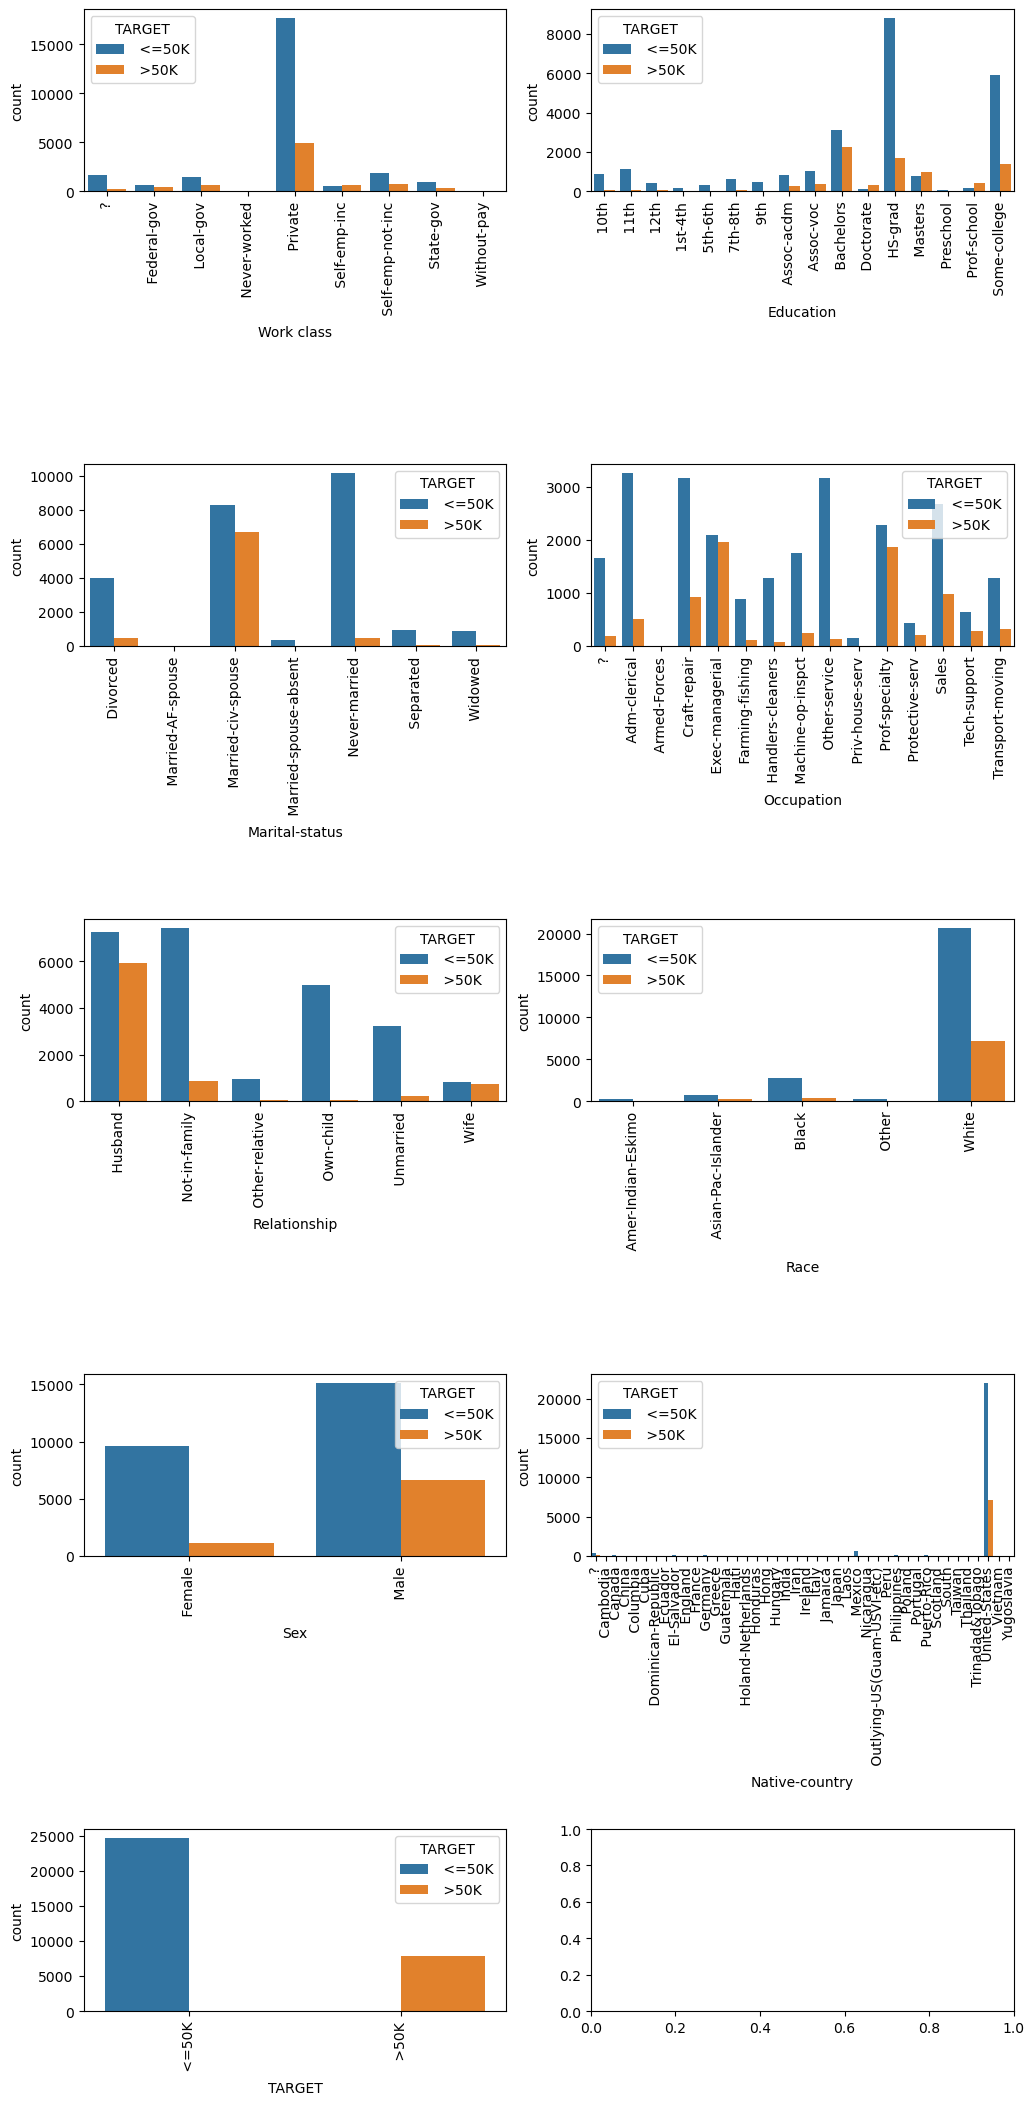

In [17]:
tempList1 = only_cat.columns
subplot = 1
fig, axes = plt.subplots(5, 2, figsize=(12,26))
fig.subplots_adjust(hspace=1.5, wspace=0.2)
for i in tempList1:
    plt.subplot(5,2,subplot)
    sns.countplot(data = df, x = i, hue="TARGET")
    plt.xticks(rotation=90)
    subplot = subplot + 1
plt.show()

#### Numerical features

##### Heatmap

A heatmap is generated to see if there is any correlation between independent variables

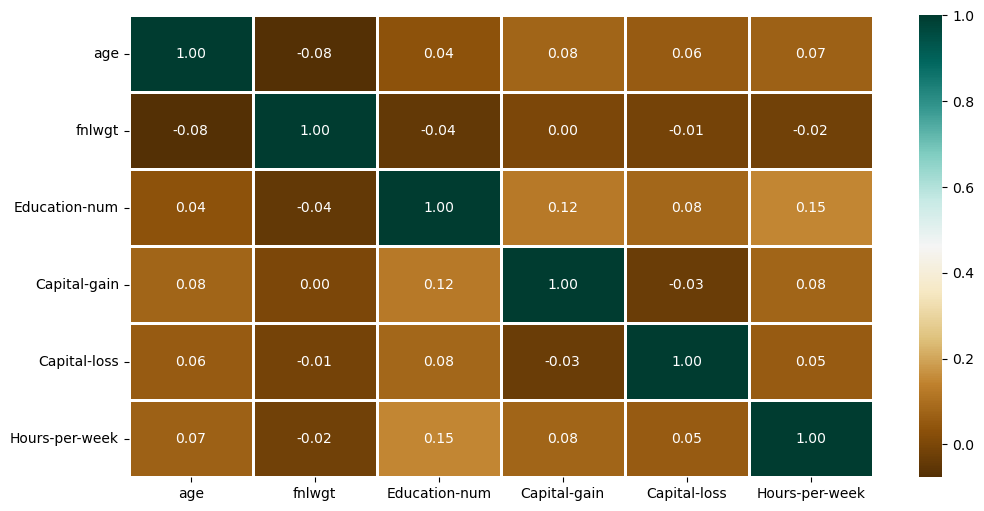

In [18]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

##### Histograms

Histograms of the numerical variables are generated to observe the data distribution

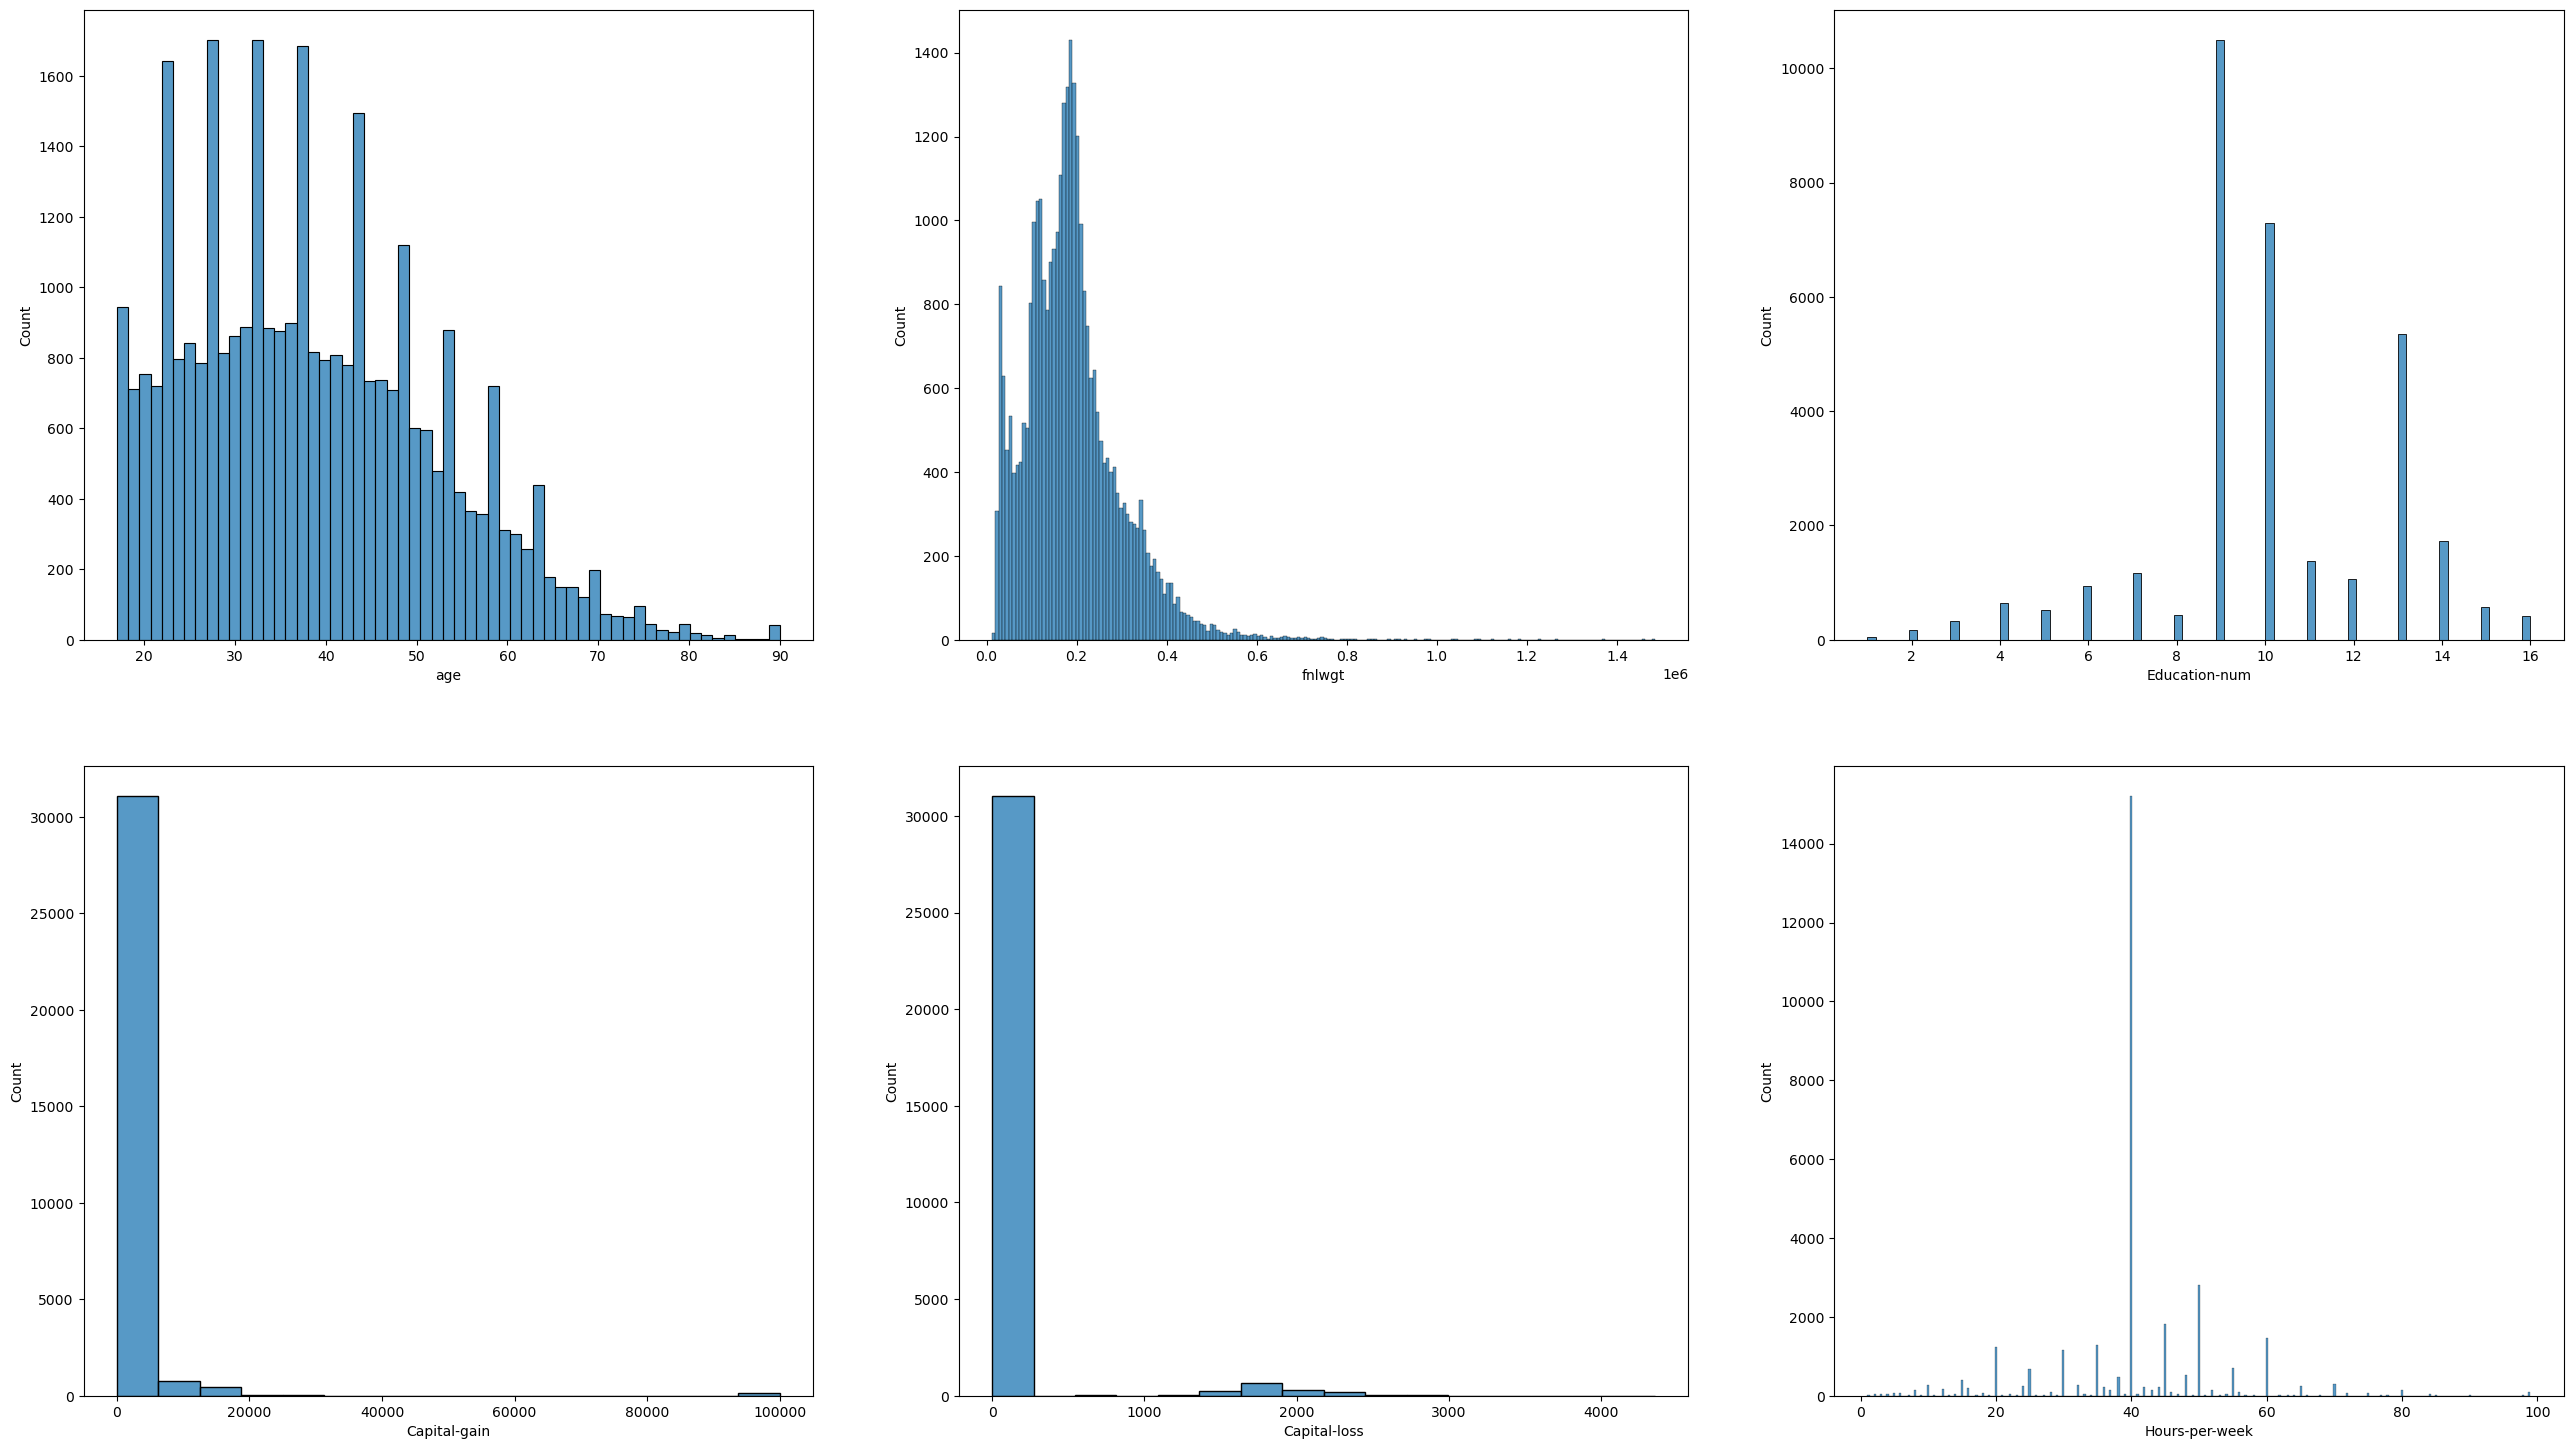

In [19]:
tempList1 = only_numeric.columns

subplot = 1
plt.figure(figsize = (32,18))
for i in tempList1:
    plt.subplot(2,3,subplot)
    sns.histplot(data = df, x = i)
    subplot = subplot + 1
plt.show()

##### Boxplots

To detect the presence of outliers, boxplots are generated. 

It is observed that various variables present a substancial amount of outliers. This will be adressed further on and will require a different approach for every variable.

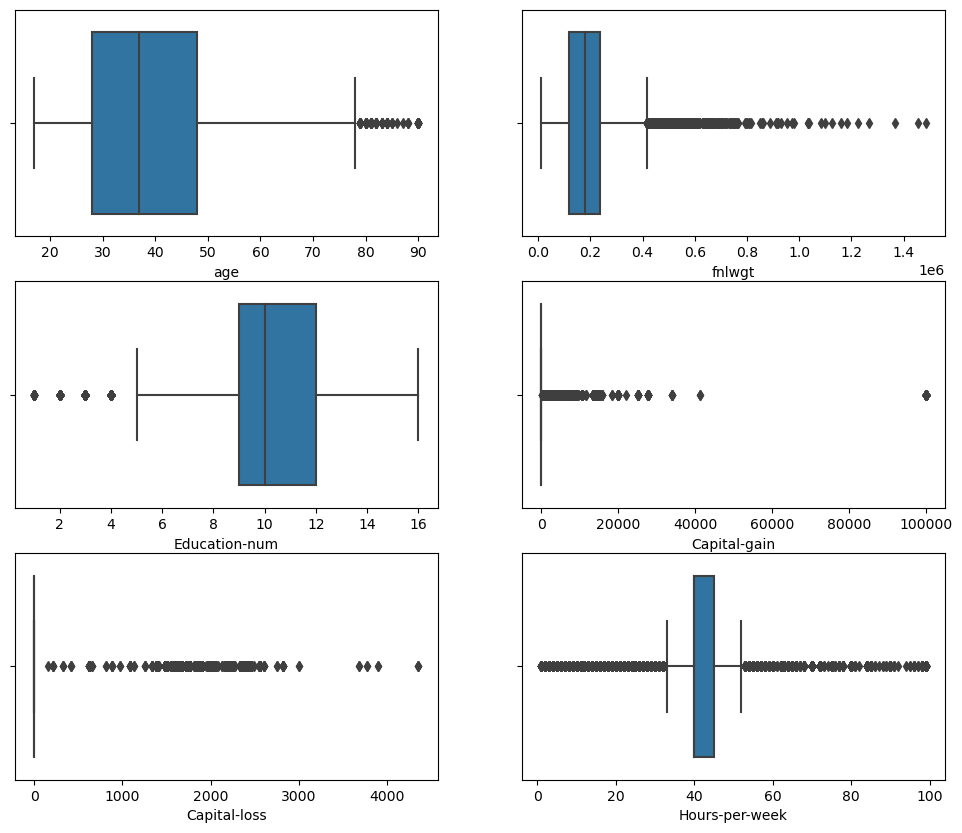

In [20]:
tempList1 = only_numeric.columns.to_list()
subplot = 1
plt.figure(figsize = (12,10))
for i in tempList1:
    plt.subplot(3,2,subplot)
    sns.boxplot(data = df, x = i, whis=1.5)
    subplot = subplot + 1
plt.show()

## Preprocessing and data transformation

### Missing values

As seen in the preliminary analysis, NA values are represented with the string '?' in this database. They are replaced with None values and later deleted from the data frame

In [21]:
df.replace(" ?", None, inplace=True)

After missing values are replaced with None values, it is observed that columns "Work class", "Occupation" and "Native-country" present null values.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   Work class      30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-num   32561 non-null  int64   
 5   Marital-status  32561 non-null  category
 6   Occupation      30718 non-null  category
 7   Relationship    32561 non-null  category
 8   Race            32561 non-null  category
 9   Sex             32561 non-null  category
 10  Capital-gain    32561 non-null  int64   
 11  Capital-loss    32561 non-null  int64   
 12  Hours-per-week  32561 non-null  int64   
 13  Native-country  31978 non-null  category
 14  TARGET          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


As decided in the rules of this project, missing values are deleted from database

In [23]:
df.dropna(inplace=True)

All rows now present the same amount of non-null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   Work class      30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   Education       30162 non-null  category
 4   Education-num   30162 non-null  int64   
 5   Marital-status  30162 non-null  category
 6   Occupation      30162 non-null  category
 7   Relationship    30162 non-null  category
 8   Race            30162 non-null  category
 9   Sex             30162 non-null  category
 10  Capital-gain    30162 non-null  int64   
 11  Capital-loss    30162 non-null  int64   
 12  Hours-per-week  30162 non-null  int64   
 13  Native-country  30162 non-null  category
 14  TARGET          30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.9 MB


### Feature removal

Some features need to be removed from database since they are either were not useful for our analysis or have too much bad data (zero values)

#### "fnlwgt" feature removal

This feature is a weight assigned by the Census Bureau to each sample. Two samples with similar final weight are more likely to share the same values for every feature. 

This feature is not ultimately relevant to our model so it's decided to delete it.

In [25]:
df = df.drop("fnlwgt", axis=1)

#### "Capital-gain" and "Capital-loss" removal

Both features present an enourmous quantity of zero values, so they will not be relevant to the model. It is decided to delete them.

In [26]:
df[["Capital-gain"]].value_counts()

Capital-gain
0               27624
15024             337
7688              270
7298              240
99999             148
                ...  
1639                1
5060                1
2387                1
6097                1
7978                1
Length: 118, dtype: int64

In [27]:
df = df.drop("Capital-gain", axis=1)

In [28]:
df[["Capital-loss"]].value_counts()

Capital-loss
0               28735
1902              194
1977              162
1887              155
1848               50
                ...  
419                 1
1944                1
2080                1
2282                1
4356                1
Length: 90, dtype: int64

In [29]:
df = df.drop("Capital-loss", axis=1) #La dropeamos porque la mayoria de sus valores son cero.

#### "Education-num" removal

This feature is basically the same as the "Education" feature but label encoded. It is decided to delete this feature and label encode "Education" feature later.

In [30]:
df = df.drop("Education-num", axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   Work class      30162 non-null  category
 2   Education       30162 non-null  category
 3   Marital-status  30162 non-null  category
 4   Occupation      30162 non-null  category
 5   Relationship    30162 non-null  category
 6   Race            30162 non-null  category
 7   Sex             30162 non-null  category
 8   Hours-per-week  30162 non-null  int64   
 9   Native-country  30162 non-null  category
 10  TARGET          30162 non-null  category
dtypes: category(9), int64(2)
memory usage: 976.1 KB


### Outlier treatment

#### Function definition

A function is defined to detect the number of outliers of a particular feature

In [32]:
def has_outliers(df, column, whis = 1.5):
    """
    Inputs:
    - df: Pandas DataFrame
    - column: String. DataFrame column name.
    - whis: Float. Interquartilic Range (IQR) multiplier
    
    Output:
    - df_no_outliers: Original DataFrame with no outliers
    
    Also, prints the number of outliers of a column from a provided DataFrame
    
    Every data point outside the range:
        Q1 - whis * IQR < x < Q3 + whis * IQR
    is considered an outlier
    """
    
    # First and third quartiles are obtained for the provided feature
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    # IQR calculation
    IQR = q3-q1
    
    # Every data point that is not inside the valid range is considered as an outlier.
    df_outliers = df[~((df[column] >= q1 - whis * IQR) & (df[column] <= q3 + whis * IQR))]
    
    # DataFrame with no outliers on the provided feature is obtained
    df_no_outliers = df[((df[column] >= q1 - whis * IQR) & (df[column] <= q3 + whis * IQR))]
    
    print(f"Provided column has {len(df_outliers)} outliers\n{round(len(df_outliers)*100/len(df[column]),2)}% of data")
    
    return df_no_outliers

Also, a function is defined to eliminate the outliers from a particular feature.

In [33]:
def delete_outliers(df, column, whis=1.5):
    """
    Inputs:
    - df: Pandas DataFrame
    - column: String. DataFrame column name.
    - whis: Float. Interquartilic Range (IQR) multiplier
    
    Output:
    - No output is generated in this function
    
    Deletes outliers from a provided feature of a Data Frame
    
    Every data point outside the range:
        Q1 - whis * IQR < x < Q3 + whis * IQR
    is considered an outlier
    """
    
    # First and third quartiles are obtained for the provided feature
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    # IQR calculation
    IQR = q3 - q1
    
    # A list with the indexes of the upper and lower outliers is generated
    outlier_index_upper = df.index[df["age"] >= (q3+whis*IQR)].to_list()
    outlier_index_lower = df.index[df["age"] <= (q1-whis*IQR)].to_list()

    # Outliers are dropped from Data Frame
    df.drop(outlier_index_upper, inplace = True)
    df.drop(outlier_index_lower, inplace = True)
    
    print(f"{len(outlier_index_lower)+len(outlier_index_upper)} outliers have been deleted from variable {column}")

#### Outlier treatment

Some features present outliers. Through the has_outliers function, these outliers are detected. 

In some features direct outlier elimination was decided due to the low number of outliers compared to the total of data. This elimination was done through the delete_outlier function.

In some other features a more complex approach was made, since direct outlier elimination was not suitable.

##### "age" feature outlier treatment

This feature presents a small quantity of outliers (<strong>0,56% of total</strong>), so it is decided to eliminate them directly from the dataset

In [34]:
age_outliers = has_outliers(df, "age")

Provided column has 169 outliers
0.56% of data


In [35]:
delete_outliers(df, "age")

169 outliers have been deleted from variable age


##### "Hours-per-week" feature outlier treatment

This feature presents a substantial quantity of outliers when compared to other features

In [36]:
df_hourspw_no_outliers = has_outliers(df, "Hours-per-week", whis= 2)

Provided column has 5902 outliers
19.68% of data


A custom function is created to divide values in this feature into 3 intervals:

- Less than 40 hours
- Exactly 40 hours
- More than 40 hours

In [37]:
def replace_hours(x):
    if x < 40:
        return "<40"
    elif x > 40:
        return ">40"
    else:
        return "40"

The previous function is applied to all the feature simultaneosly, as follows:

In [38]:
df['Hours-per-week'] = df['Hours-per-week'].apply(replace_hours)

DataFrame is printed to ensure that the changes have been made correctly. As seen below, "Hours-per-week" feature now only has 3 unique values.

In [39]:
df.head()

,age,Work class,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,TARGET
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


This feature now presents only 3 unique values:

In [40]:
df["Hours-per-week"].unique()

array(['40', '<40', '>40'], dtype=object)

In [41]:
df["Hours-per-week"].value_counts()

40     14211
>40     9175
<40     6607
Name: Hours-per-week, dtype: int64

The feature type is changed to categorical, since it no longer represents number of hours

In [42]:
df["Hours-per-week"] = pd.Categorical(df["Hours-per-week"])

A bar plot is generated to observe the distribution between classes

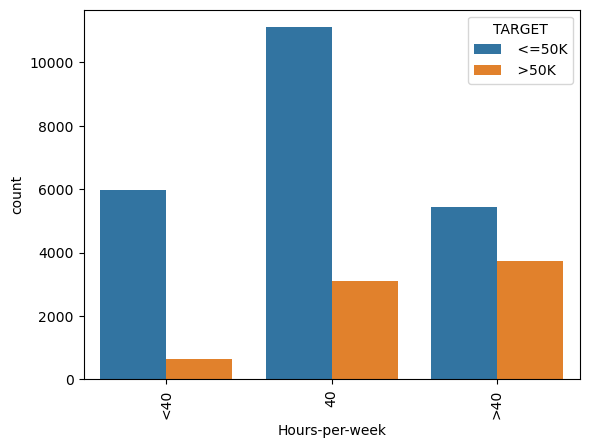

In [43]:
orden_categorias = ["<40", "40" , ">40"] # Crea una lista con el orden deseado de las categorías

sns.countplot(data=df, x="Hours-per-week", hue="TARGET", order=orden_categorias)
plt.xticks(rotation=90)
plt.show()

##### "Native-country" feature outlier treatment

The vast majority of entries belong to the United States, so it is decided to transform every other country to class "Other". To make this change, a custom function is built.

In [44]:
def replace_countries(x):
    if x == " United-States":
        return " United-States"
    else:
        return "Other"

Function is applied to the feature as follows

In [45]:
df['Native-country'] = df['Native-country'].apply(replace_countries)

Now, feature only has two unique elements:

In [46]:
df['Native-country'].unique()

array([' United-States', 'Other'], dtype=object)

Feature is transformed again into categorical:

In [47]:
df["Native-country"] = pd.Categorical(df["Native-country"])

Data types are printed to ensure that the changes have been made succesfully. As observed below, "Native-country" feature is categorical again.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29993 non-null  int64   
 1   Work class      29993 non-null  category
 2   Education       29993 non-null  category
 3   Marital-status  29993 non-null  category
 4   Occupation      29993 non-null  category
 5   Relationship    29993 non-null  category
 6   Race            29993 non-null  category
 7   Sex             29993 non-null  category
 8   Hours-per-week  29993 non-null  category
 9   Native-country  29993 non-null  category
 10  TARGET          29993 non-null  category
dtypes: category(10), int64(1)
memory usage: 764.5 KB


A bar plot is printed to observe the class distribution on this feature

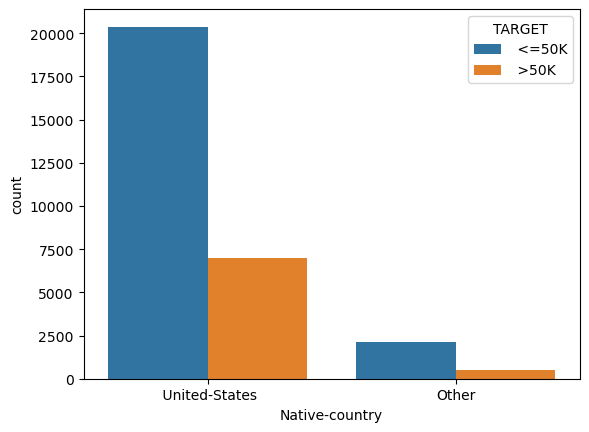

In [49]:
sns.countplot(data=df, x="Native-country", hue="TARGET")
plt.show()

##### "races" feature outlier treatment

In the same manner as in the previous feature, the vast majority of entries of this particular feature belong to the same class ("White"). A custom function is built to clasify all entries that have a different race from "White" into "Other"

In [50]:
def replace_races(x):
    if x == " White":
        return " White"
    else:
        return "Other"

Function is then applied to all the feature simultaneosly:

In [51]:
df['Race'] = df['Race'].apply(replace_races)

After the changes have been made, feature only presents two unique values:

In [52]:
df['Race'].unique()

array([' White', 'Other'], dtype=object)

Feature is transformed again into categorical:

In [53]:
df["Race"] = pd.Categorical(df["Race"])

Data types are printed to ensure that the changes have been made succesfully. As observed below, "Native-country" feature is categorical again.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29993 non-null  int64   
 1   Work class      29993 non-null  category
 2   Education       29993 non-null  category
 3   Marital-status  29993 non-null  category
 4   Occupation      29993 non-null  category
 5   Relationship    29993 non-null  category
 6   Race            29993 non-null  category
 7   Sex             29993 non-null  category
 8   Hours-per-week  29993 non-null  category
 9   Native-country  29993 non-null  category
 10  TARGET          29993 non-null  category
dtypes: category(10), int64(1)
memory usage: 764.4 KB


A bar plot is printed to observe the new class distribution on this feature

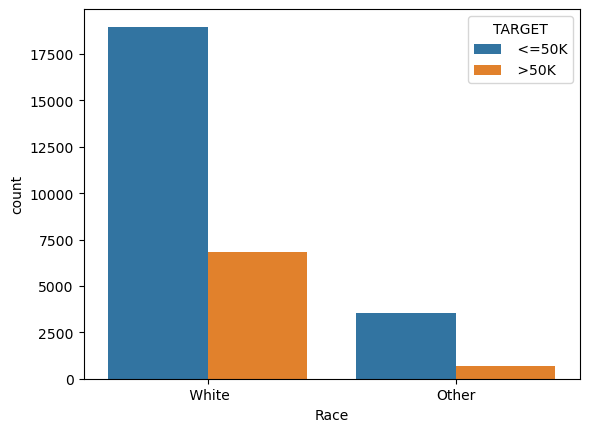

In [55]:
sns.countplot(data=df, x="Race", hue="TARGET")

plt.show()

### Data Modelling

#### Train and test sets generation

Main dataset is divided into a subset containing the dependent variables and another one containing the target variable

In [56]:
X = df.drop(["TARGET"],axis =  1)

In [57]:
y = df["TARGET"]

Test size is kept at 20%, since it's a standard value. This can be later changed if improvement in model accuracy is needed.

Stratify parameter is set to 'y' to maintain original distribution of labels with >50k (23.93%) and labels with <=50k (76.07%)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify= y)

Sets dimensions are printed to ensure that no mistakes where made

In [59]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((23994, 10), (5999, 10), (23994,), (5999,))

#### Data normalization

Numerical features are standardized using a standard scaler. This improves algorithm accuracy for Machile Learning models.

In [60]:
sc = StandardScaler()
X_train_num = X_train.select_dtypes(include=["int64", "float64"])
X_test_num = X_test.select_dtypes(include=["int64", "float64"])

X_train_num = sc.fit_transform(X_train_num)
X_test_num = sc.fit_transform(X_test_num) # El fit se debe quitar

#### Data encoding

Categorical features and target variable are enconded as a one-hot numeric array. 

Distinction is made between binary categorical features (only two options) and non binary categorical features (more than two options) to enable label encoding to the later if needed in future variations of this project.

##### Independent variables

Binary categorical features are selected and then encoded

In [61]:
cats_binary_train = X_train[["Race", "Native-country", "Sex", "Relationship"]]
cats_binary_test = X_test[["Race", "Native-country", "Sex", "Relationship"]]

In [62]:
encoder = OneHotEncoder(drop="first")

cats_binary_train = encoder.fit_transform(cats_binary_train).toarray()
cats_binary_test = encoder.fit_transform(cats_binary_test).toarray()

Non binary categorical features are selected and then encoded

In [63]:
cats_non_binary_train = X_train[["Work class","Hours-per-week", "Marital-status", "Occupation", "Education"]]
cats_non_binary_test = X_test[["Work class","Hours-per-week", "Marital-status", "Occupation", "Education"]]

In [64]:
encoder = OneHotEncoder(drop="first")

cats_non_binary_train = encoder.fit_transform(cats_non_binary_train)
cats_non_binary_test = encoder.transform(cats_non_binary_test).toarray()

All features are finally concatenated to obtain the set that will feed the Machine Learning algorithms

In [65]:
X_train = np.concatenate((X_train_num, cats_binary_train,cats_non_binary_train.toarray()), axis=1)
X_test = np.concatenate((X_test_num, cats_binary_test,cats_non_binary_test), axis=1)

##### Target variable

Target variable is also one hot encoded

In [66]:
encoder = OneHotEncoder(drop="first")

y_train = pd.DataFrame(y_train)
y_train = encoder.fit_transform(y_train).toarray()

y_test = pd.DataFrame(y_test)
y_test = encoder.fit_transform(y_test).toarray()

Encoded target variable is printed to ensure that changes have been made correctly

In [67]:
unique, counts = np.unique(y_train, return_counts=True)

np.set_printoptions(precision=2, suppress=True)  

print(np.asarray((unique, counts)).T)

[[    0. 18011.]
 [    1.  5983.]]


In [68]:
unique, counts = np.unique(y_test, return_counts=True)

np.set_printoptions(precision=2, suppress=True)  

print(np.asarray((unique, counts)).T)

[[   0. 4503.]
 [   1. 1496.]]


## Application of algorithms

### Logistic Regression

#### Model instantiation

Model is first instantiated:

In [69]:
logisticRegr = LogisticRegression(max_iter=10000)

#### Model fitting

Model is then fitted according to the given training data (X and y training sets)

In [70]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Label prediction

Class labels are then predicted for samples in X test set

In [71]:
y_pred = logisticRegr.predict(X_test)

#### Evaluation metrics

##### Accuracy

Mean accuracy is obtained for the prediction made on X test set

In [72]:
print('Accuracy: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

Accuracy: 0.83


##### Confusion Matrix

Confusion matrix is computed and then ploted to evaluate the accuracy of the clasification

In [73]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4102  401]
 [ 628  868]]


[[4102  401]
 [ 628  868]]


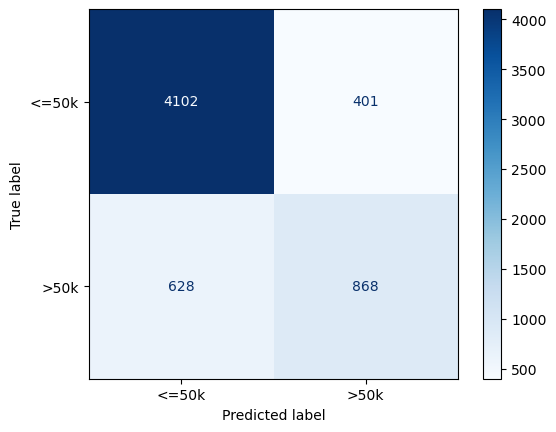

In [74]:
class_names = ['<=50k', '>50k']

disp = plot_confusion_matrix(logisticRegr, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)

print(disp.confusion_matrix)

##### Other evaluation metrics

The following metrics are also calculated:
- Accuracy
- Precision
- Recall
- F1 score

In [75]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.828471
Precision: 0.684003
Recall: 0.580214
F1 score: 0.627848


##### ROC Curve

Compute Receiver operating characteristic (ROC) is also computed and then plotted

In [76]:
from sklearn.preprocessing import LabelEncoder

# encode the target variable
le = LabelEncoder()
y_test = le.fit_transform(y_test)


logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])

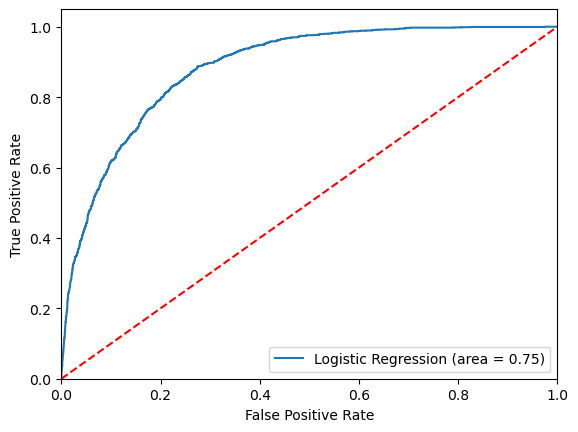

In [77]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### K Nearest Neighbors

#### Model instantiation

Model is first instantiated:

In [78]:
clf = KNeighborsClassifier(n_neighbors=50)

#### Model fitting

Model is then fitted according to the given training data (X and y training sets)

In [79]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### Label prediction

Class labels are then predicted for samples in X test set

In [80]:
y_test_pred = clf.predict(X_test)

#### Evaluation metrics

##### Accuracy

Mean accuracy is obtained for train and test set

In [81]:
print('- Accuracy in train set: {}'.format(clf.score(X_train, y_train)))
print('- Accuracy in test  set: {}'.format(clf.score(X_test, y_test)))

- Accuracy in train set: 0.8375010419271485
- Accuracy in test  set: 0.8319719953325554


##### Other evaluation metrics

The following metrics are also calculated:
- Accuracy
- Precision
- Recall
- F1 score

In [82]:
print("- Accuracy: ", round(accuracy_score(y_test, y_test_pred), 2))
print("- Precision:", round(precision_score(y_test, y_test_pred,pos_label=1),2))
print("- Recall:", recall_score(y_test, y_test_pred,pos_label=1))
print("- Fscore:", round(f1_score(y_test, y_test_pred, pos_label=1),2))

- Accuracy:  0.83
- Precision: 0.68
- Recall: 0.6049465240641712
- Fscore: 0.64


##### Confusion Matrix

Confusion matrix is computed to evaluate the accuracy of the clasification

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[4086,  417],
       [ 591,  905]], dtype=int64)

In [84]:
print(classification_report(y_true=y_test,y_pred = y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4503
           1       0.68      0.60      0.64      1496

    accuracy                           0.83      5999
   macro avg       0.78      0.76      0.77      5999
weighted avg       0.83      0.83      0.83      5999



In [85]:
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_w = []
resultados_test_w  = []

for k in valores_k:
    
    clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_u.fit(X_train, y_train)
    y_train_pred = clf_u.predict(X_train)
    y_pred = clf_u.predict(X_test)
    resultados_train_u.append(accuracy_score(y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(y_test, y_pred))

    clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_w.fit(X_train, y_train)
    y_train_pred = clf_w.predict(X_train)
    y_pred = clf_w.predict(X_test)
    resultados_train_w.append(accuracy_score(y_train, y_train_pred))
    resultados_test_w.append(accuracy_score(y_test, y_pred))

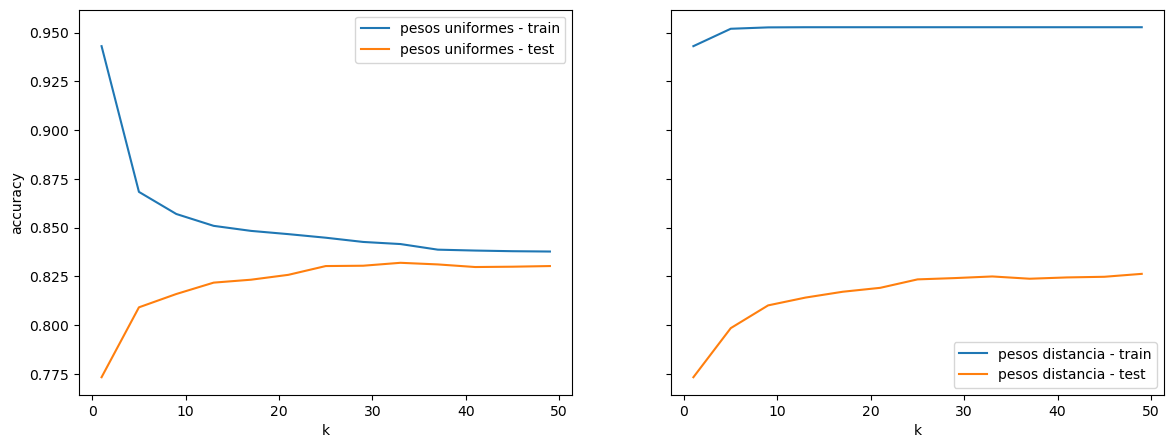

In [86]:
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

### Decision Tree

#### Model instantiation

Model is first instantiated:

In [87]:
arbol = DecisionTreeClassifier(criterion='gini', splitter="best", max_depth=7, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)

#### Model fitting

Model is then fitted according to the given training data (X and y training sets)

In [88]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=7)

In [89]:
accuracy_score(y_train, arbol.predict(X_train))

0.8292073018254563

#### Label prediction

Class labels are then predicted for samples in X test set

In [90]:
y_pred=arbol.predict(X_test)

#### Evaluation metrics

##### General metrics

The following metrics are calculated in a classification report:
- Accuracy
- Precision
- Recall
- F1 score

In [91]:
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4503
           1       0.72      0.47      0.57      1496

    accuracy                           0.82      5999
   macro avg       0.78      0.71      0.73      5999
weighted avg       0.81      0.82      0.81      5999



##### Confusion matrix

Confusion matrix is computed and then ploted to evaluate the accuracy of the clasification

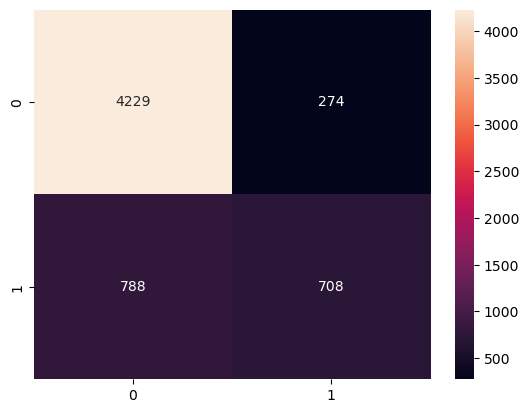

In [92]:
cf_matrix = confusion_matrix(y_test, arbol.predict(X_test))
sns.heatmap(cf_matrix,fmt = "d", annot=True);

##### Accuracy vs. depth

To ensure that the chosen depth for the model is optimal, accuracy is ploted against the depth for the training and test sets. As seen in the plot below, optimal value for depth happens around 8.

In [93]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

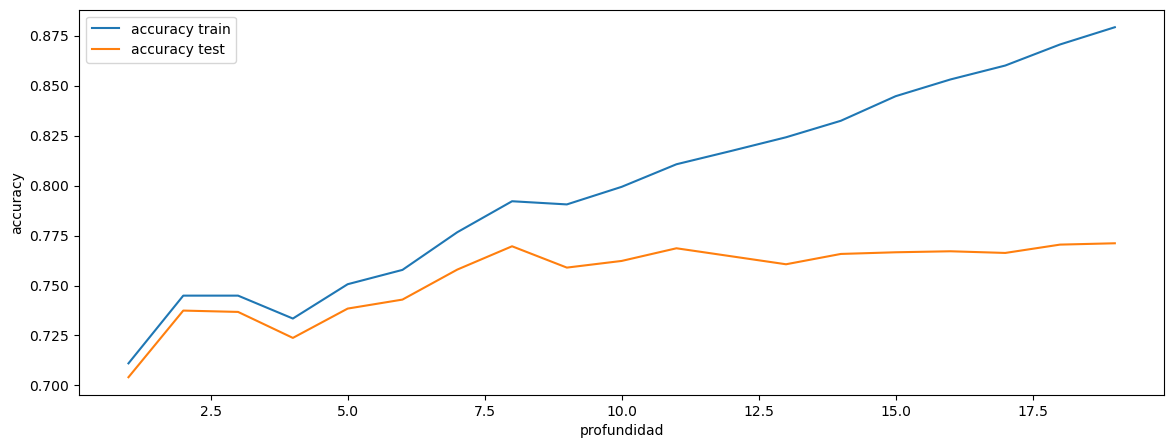

In [94]:
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

For the tree model, a depth of 7 would be selected. As it is known, tree models tend to overfit, and in this case a higher number than 7 would lead to overfitting.

## Conclusion

The knn model is selected as has beter evaluation metrics. Its parametres are k=50, weights= 'uniform'. The rest are the default parametres.